# **Life Expectancy - Advanced Regression**

## Introduction

Life expectancy is the average number of years a person is expected to live and is a very important scale, used to determine the well-being and overall health of a population. Life expectancy has increased greatly in the last century, nearly doubling since the 19th Century. However, there is still a great discrepancy in life expectancies between countries around the world. In this project, I will analyse the different factors that affect life expectancy, the importance of each of the factor and the possible correlations between these factors. At the end, I will build a Machine Learning model from scratch, to predict the Life Expectancy of a country in a given year.

## The Dataset

I retrieved this dataset from Kaggle: https://www.kaggle.com/kumarajarshi/life-expectancy-who. This dataset is originally from the World Health Organization and it consists of the life expectancies of the population of different countries around the world. Additionally, it also includes information about the status, average BMI, GDP, population, etc. of these countries. This data should be sufficient in providing insightful observations about each country and the differences/similarities between different countries. I will also include a Data Dictionary in this project to explain the more complex features in detail.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing libraries
import numpy as np
import pandas as pd
import math
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

S:\anaconda3\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [2]:
# Retrieve the dataset and store it in a dataframe
life_expectancy_org_df = pd.read_csv("datasets/life_expectancy.csv")
life_expectancy_org_df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
# Get a copy of the original dataframe
life_expectancy_df = life_expectancy_org_df.copy()

In [4]:
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
life_expectancy_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
life_expectancy_df.info

<bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \


## Summary of the Data

Number of observations: 2938 rows <br>
Number of features: 22 <br>
Features' types: integer, float, object <br>
Most of the features are quantitative features, with either discrete or continuous values. The features have varied name formats and some have vague names. I will rename the features, giving them clearer, more informative names and a standardized name format.

In [7]:
renamed_features = ['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality', 'InfantDeaths', 'Alcohol', 'HealthExpendGDP',
                    'HepatitisBImmunCover', 'MeaslesCases', 'BMI', 'Under-FiveDeaths', 'PolioImmunCover', 'HealthExpendTotalExpend',
                    'DiphtheriaImmunCover', 'HIV/AIDSDeath', 'GDP', 'Population', 'Thinness10-19', 'Thinness5-9', 'HDIIncomeCompo',
                    'SchoolingYears']
life_expectancy_df.columns = renamed_features
life_expectancy_df.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'HealthExpendGDP', 'HepatitisBImmunCover',
       'MeaslesCases', 'BMI', 'Under-FiveDeaths', 'PolioImmunCover',
       'HealthExpendTotalExpend', 'DiphtheriaImmunCover', 'HIV/AIDSDeath',
       'GDP', 'Population', 'Thinness10-19', 'Thinness5-9', 'HDIIncomeCompo',
       'SchoolingYears'],
      dtype='object')

## Data Dictionary

Status: Either Developed or Developing <br>
LifeExpectancy: Life Expectancy in age <br>
AdultMortality: Probability of dying between 15 and 60 years per 1000 population <br>
InfantDeaths: Number of Infant Deaths per 1000 population <br>
Alcohol: Per capita (15+) consumption, in litres of pure alcohol <br>
HealthExpendGDP: Expenditure on Health as a percentage of Gross Domestic Product per capita (%) <br>
HepatitisBImmunCover: Hepatitis B immunization coverage among 1-year-olds (%) <br>
MeaslesCases: Reported cases of Measles per 1000 population <br>
BMI: Average Body Mass Index of the entire population <br>
Under-FiveDeaths: Number of under-five deaths per 1000 population <br>
PolioImmunCover: Polio immunization coverage among 1-year-olds (%) <br>
HealthExpendTotalExpend: Government Expenditure on Health as a percentage of Total Government Expenditure (%) <br>
DiphtheriaImmunCover: Diphtheria Tetanus Toxoid and Pertussis immunization coverage among 1-year-olds (%) <br>
HIV/AIDSDeath: Deaths per 1000 live births with HIV/AIDS (0-4 years) <br>
GDP: Gross Domestic Product per capita in USD <br>
Population: Population Size of a country <br>
Thinness10-19: Thinness among adolescents for age 10 to 19 (%) <br>
Thinness5-9: Thinness among children for age 5 to 9 (%) <br>
HDIIncomeCompo: Human Development Index in terms of Income Composition of Resources (ranging from 0 to 1) <br>
SchoolingYears: Number of years of Schooling

## Overall Plan

* Initial Cleaning and Preprocessing: Perform an initial preprocessing on the data (i.e: Dealing with Null values)
* Exploratory Data Analysis: Create plots and graphs to observe and analyse trends in the data
* Data Cleaning and Preprocessing: Thoroughly clean and preprocess the data (i.e: Transform distribution, deal with rare categorical values, encoding categorical features, etc.)
* Feature Engineering: Create new features by combining features, extracting parts of existing features and modifying existing features
* Modelling: Create a Machine Learning model that would be suitable for the data and the goal of this project
* Evaluation: Evaluate the model, retrieving its accuracy on a test dataset
* Conclusion: Give a conclusion on what I have learned from this project

## Dealing with NULL values

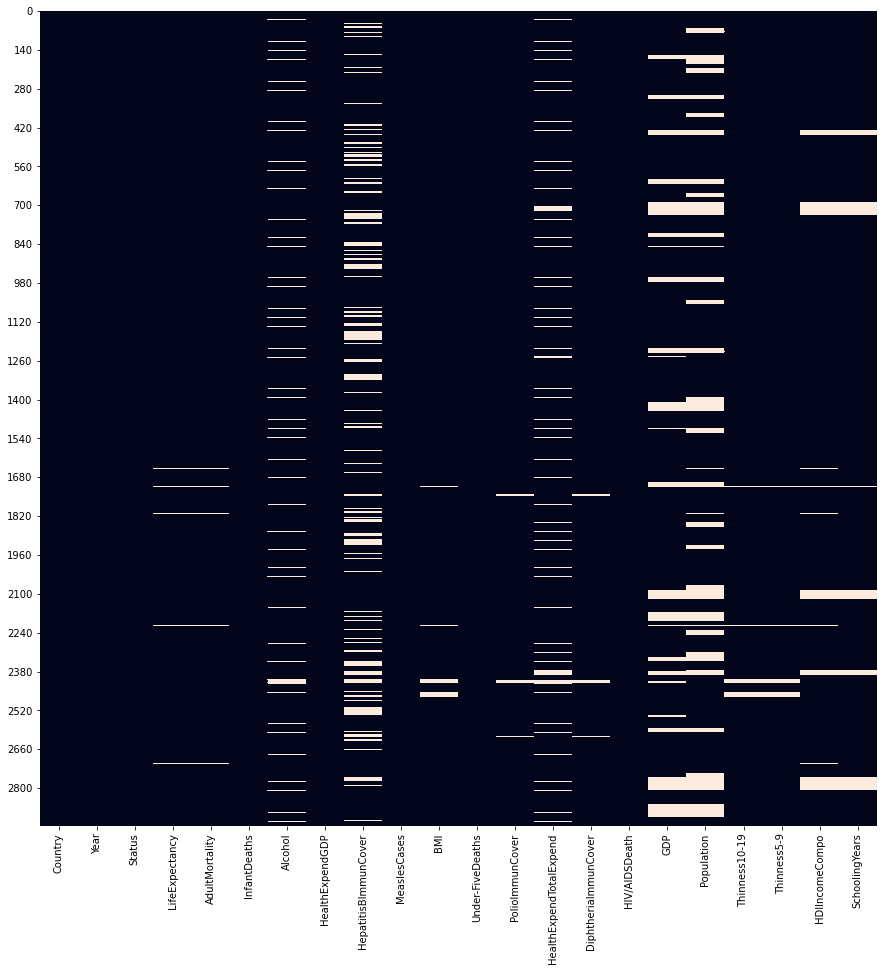

In [8]:
# Heatmap to observe the density of null values in each feature
null_heatmap = sns.heatmap(life_expectancy_df.isnull(), cbar=False)
null_heatmap.figure.set_size_inches(15, 15)

There are NULL values in many of the features. However, none of the features have an overwhelming number of NULL values, therefore, all features will be kept and the NULL values will be replaced appropriately.

In [9]:
# Retrieve the specific number of null values in each feature
null_features = life_expectancy_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:25s}{}".format(key, value))

Country                  0
Year                     0
Status                   0
LifeExpectancy           10
AdultMortality           10
InfantDeaths             0
Alcohol                  194
HealthExpendGDP          0
HepatitisBImmunCover     553
MeaslesCases             0
BMI                      34
Under-FiveDeaths         0
PolioImmunCover          19
HealthExpendTotalExpend  226
DiphtheriaImmunCover     19
HIV/AIDSDeath            0
GDP                      448
Population               652
Thinness10-19            34
Thinness5-9              34
HDIIncomeCompo           167
SchoolingYears           163


Population has the highest number of NULL values so I will work with it first. Since many countries have more than one row of observations (one row for each year), the mean population of the rows with data can be used to replace the NULL values. However, if a country only has one row of observation and the population is missing, then I will replace the NULL value with the mean of all other observations with the same country's Status.

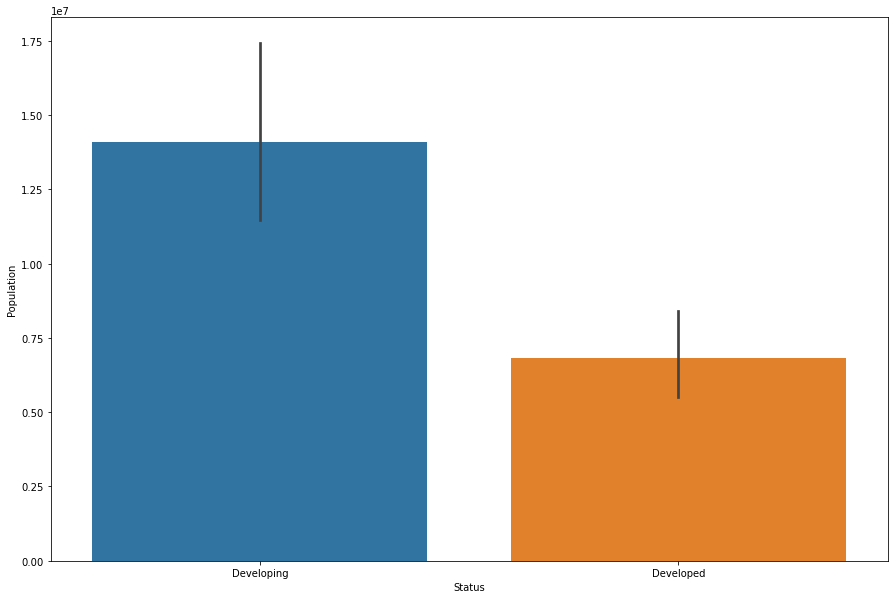

In [10]:
# Determine whether there is a difference in Population between countries of different Statuses
sns.barplot(x='Status', y='Population', data=life_expectancy_df).figure.set_size_inches(15, 10)

Developing countries' average Population size doubles the average Population size of Developed countries. So there is a noticeable difference in Population between Developed and Developing countries.

In [11]:
# Filling in missing values in Population feature
for index, row in life_expectancy_df.iterrows():
    # If the Population value for the observation is missing
    if np.isnan(row['Population']):
        # Get the number of observations with the same Country value
        n_rows = life_expectancy_df.loc[life_expectancy_df['Country'] == row['Country']]
        # If there is only one observation for that Country, or if all observations for that Country have missing Population values
        if len(n_rows) == 1 or np.isnan(life_expectancy_df.loc[(life_expectancy_df['Country'] == row['Country']), 'Population'].mean()):
            # Replace NULL values with the mean of all observations with the same Status value
            life_expectancy_df.at[index, 'Population'] = life_expectancy_df.loc[(life_expectancy_df['Status'] == row['Status']), 'Population'].mean()
            
        else:
            # Replace NULL values with the mean of all observations with the same Country value
            life_expectancy_df.at[index, 'Population'] = life_expectancy_df.loc[(life_expectancy_df['Country'] == row['Country']), 'Population'].mean()

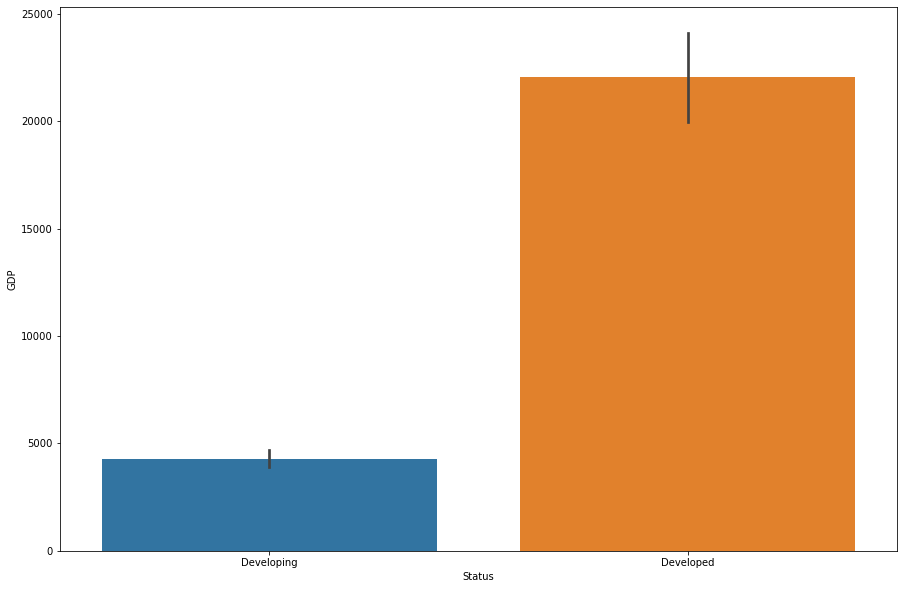

In [12]:
sns.barplot(x='Status', y='GDP', data=life_expectancy_df).figure.set_size_inches(15, 10)

Similar to Population, there is a great discrepancy in GDP between Developed and Developing countries. Therefore, I will apply a similar tactic as above to deal with NULL values in GDP.

In [13]:
# Filling in missing values in GDP feature using the same strategy as above
for index, row in life_expectancy_df.iterrows():
    if np.isnan(row['GDP']):
        n_rows = life_expectancy_df.loc[life_expectancy_df['Country'] == row['Country']]
        if len(n_rows) == 1 or np.isnan(life_expectancy_df.loc[(life_expectancy_df['Country'] == row['Country']), 'GDP'].mean()):
            life_expectancy_df.at[index, 'GDP'] = life_expectancy_df.loc[(life_expectancy_df['Status'] == row['Status']), 'GDP'].mean()
            
        else:
            life_expectancy_df.at[index, 'GDP'] = life_expectancy_df.loc[(life_expectancy_df['Country'] == row['Country']), 'GDP'].mean()

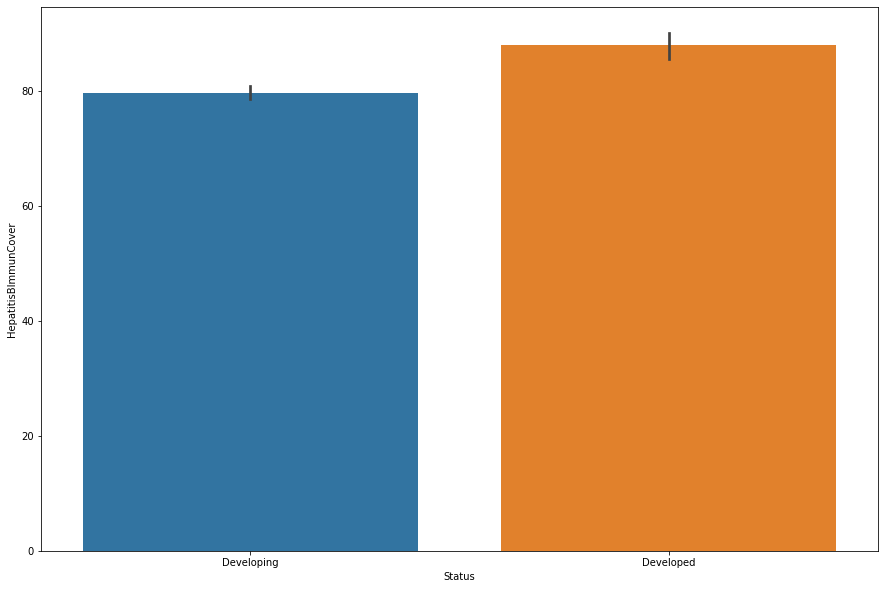

In [14]:
sns.barplot(x='Status', y='HepatitisBImmunCover', data=life_expectancy_df).figure.set_size_inches(15, 10)

For HepatitisBImmunCover, Developing and Developed countries have very similar values to one another, with only a small difference.

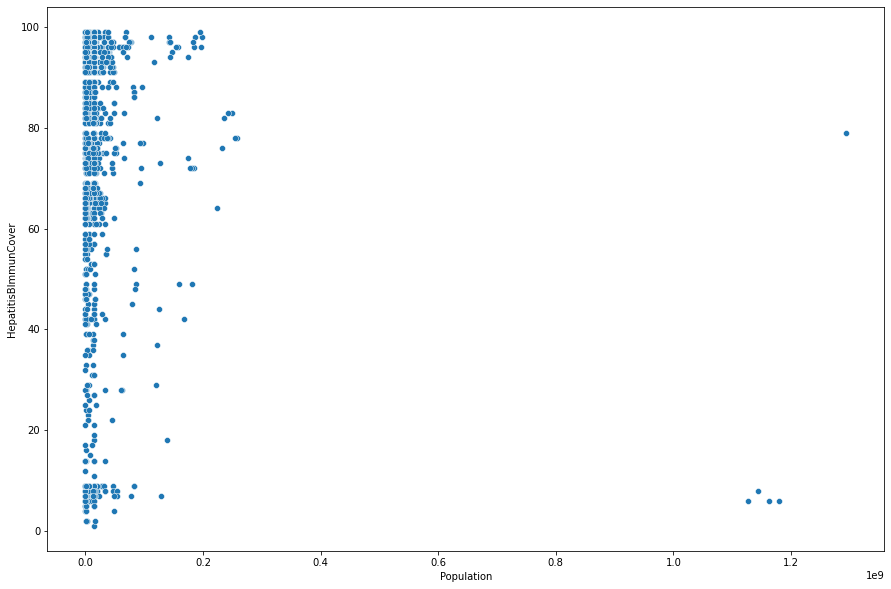

In [15]:
sns.scatterplot(x='Population', y='HepatitisBImmunCover', data=life_expectancy_df).figure.set_size_inches(15, 10)

Most observations are in the lower ranges of Population size, yet even here, the values for HepatitisBImmunCover varies wildly with many observations having low values, while others having high values. Thus, there is no correlation here.

In [16]:
# Replace HepatitisBImmunCover missing values with the mean value
life_expectancy_df.fillna(life_expectancy_df['HepatitisBImmunCover'].mean(), inplace=True)

For the rest of the features, the mean will be used to replace NULL values in numerical features, and the first mode will be used for categorical features.

In [17]:
for feature in life_expectancy_df:
    if life_expectancy_df[feature].dtype == object:
        life_expectancy_df[feature].fillna(life_expectancy_df[feature].mode()[0], inplace=True)
    
    elif life_expectancy_df[feature].dtype != object:
        life_expectancy_df[feature].fillna(life_expectancy_df[feature].mean(), inplace=True)

In [18]:
# Check to see if NULl values in all features are dealt with
null_features = life_expectancy_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:25s}{}".format(key, value))

Country                  0
Year                     0
Status                   0
LifeExpectancy           0
AdultMortality           0
InfantDeaths             0
Alcohol                  0
HealthExpendGDP          0
HepatitisBImmunCover     0
MeaslesCases             0
BMI                      0
Under-FiveDeaths         0
PolioImmunCover          0
HealthExpendTotalExpend  0
DiphtheriaImmunCover     0
HIV/AIDSDeath            0
GDP                      0
Population               0
Thinness10-19            0
Thinness5-9              0
HDIIncomeCompo           0
SchoolingYears           0


## Exploratory Data Analysis

In the section, I will explore the correlations between different features to identitfy trends and patterns within the data. The results from the analysis will be useful for Data Cleaning and Preprocessing. Furthermore, I will be able to gather valuable insights on the topic at hand and make conclusions based on the data. I will be dividing this section into five parts, in each part, I will be closely analysing one of the features and its correlations with the other features.

### Country

This dataset includes multiple rows of observations for each country. I will filter out only the unique rows, one for each unique country and analyse the Status and Life Expectancy of each country by name.

In [19]:
unique_countries = life_expectancy_df.drop_duplicates('Country', keep='first')
unique_countries.reset_index(inplace=True)
unique_countries_status = unique_countries.loc[:, ['Country', 'Status']]
print(unique_countries_status.to_string())

                                                  Country      Status
0                                             Afghanistan  Developing
1                                                 Albania  Developing
2                                                 Algeria  Developing
3                                                  Angola  Developing
4                                     Antigua and Barbuda  Developing
5                                               Argentina  Developing
6                                                 Armenia  Developing
7                                               Australia   Developed
8                                                 Austria   Developed
9                                              Azerbaijan  Developing
10                                                Bahamas  Developing
11                                                Bahrain  Developing
12                                             Bangladesh  Developing
13                  

There are 193 different countries in this dataset. From a quick overview, I can observe that most of the countries are Developing countries. 

In [20]:
unique_countries_life_expectancy = unique_countries.loc[:, ['Country', 'LifeExpectancy']]
print(unique_countries_life_expectancy.to_string(), "\n")
highest_le = unique_countries_life_expectancy.loc[(unique_countries_life_expectancy['LifeExpectancy'] == unique_countries_life_expectancy['LifeExpectancy'].max()), 'Country']
lowest_le = unique_countries_life_expectancy.loc[(unique_countries_life_expectancy['LifeExpectancy'] == unique_countries_life_expectancy['LifeExpectancy'].min()), 'Country']
print("{} have the highest Life Expectancy at {} years.".format(highest_le.values[0], unique_countries_life_expectancy['LifeExpectancy'].max()))
print("{} have the lowest Life Expectancy at {} years.".format(lowest_le.values[0], unique_countries_life_expectancy['LifeExpectancy'].min()))
print("The Average Life Expectancy is {:.1f} years.".format(unique_countries_life_expectancy['LifeExpectancy'].mean()))

                                                  Country  LifeExpectancy
0                                             Afghanistan       65.000000
1                                                 Albania       77.800000
2                                                 Algeria       75.600000
3                                                  Angola       52.400000
4                                     Antigua and Barbuda       76.400000
5                                               Argentina       76.300000
6                                                 Armenia       74.800000
7                                               Australia       82.800000
8                                                 Austria       81.500000
9                                              Azerbaijan       72.700000
10                                                Bahamas       76.100000
11                                                Bahrain       76.900000
12                                    

### Year

Many features in this dataset could be following a trend dependent on time. In this part, I will analyse which feature are most affected by the passage of time and whether the data could be predicted based on time.

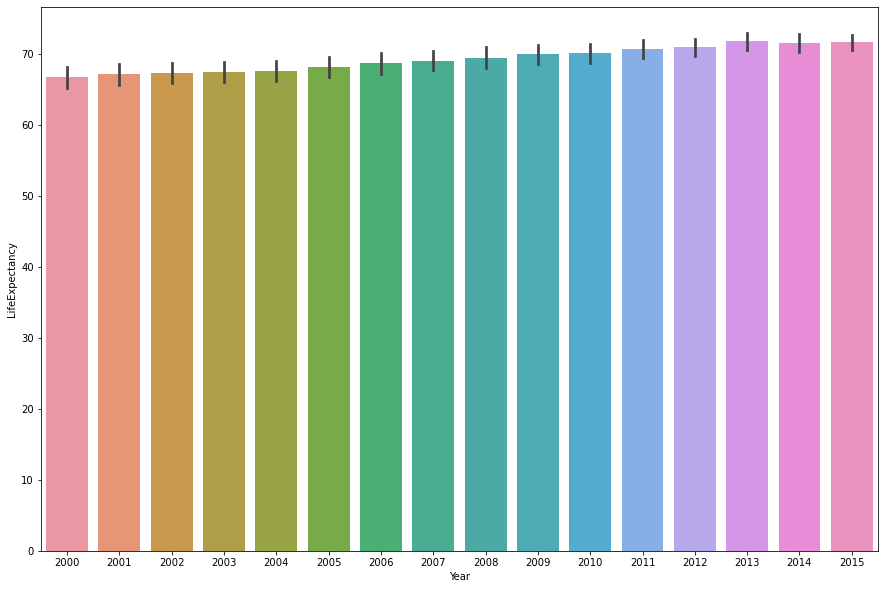

In [21]:
sns.barplot(x='Year', y='LifeExpectancy', data=life_expectancy_df).figure.set_size_inches(15, 10)

The average Life Expectancy of all the countries in the dataset increases gradually from 2000 to 2015. Most countries are at a state of peace and prosperity during this period of time, therefore, there are no significant drop in Life Expectancy throughout this period. If no major disruptions occur in the near future, I can expect that the average Life Expectancy will increase gradually over the years for most countries.

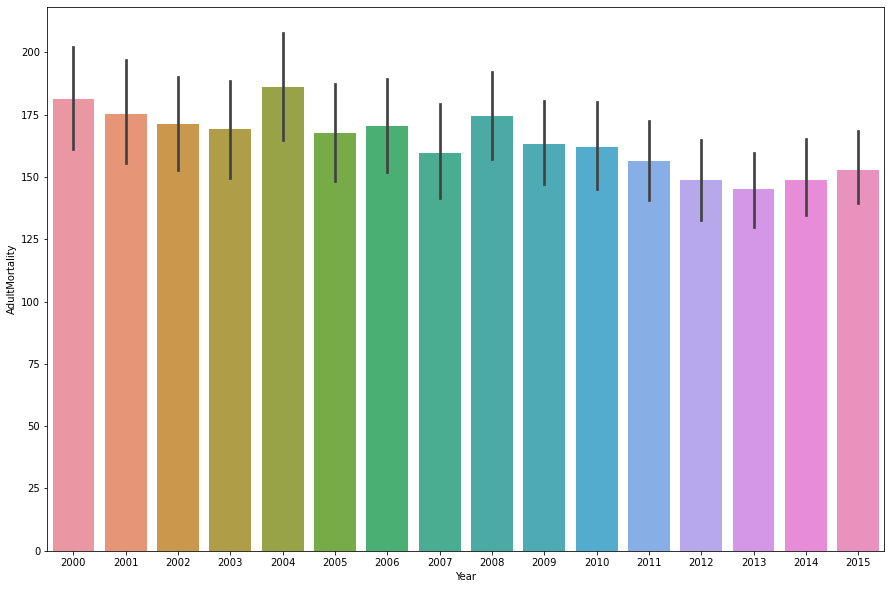

In [22]:
sns.barplot(x='Year', y='AdultMortality', data=life_expectancy_df).figure.set_size_inches(15, 10)

The trend for Adult Mortality rates is not as clear as that of Life Expectancies, rising and decreasing in certain years. However, it is apparent that Adult Mortality shows an overall downward trend, and in general, decrease over the years. Similar to Life Expectancy, I expect that the Adult Mortality rates will generally decrease throughout the years, albeit with ups and downs.

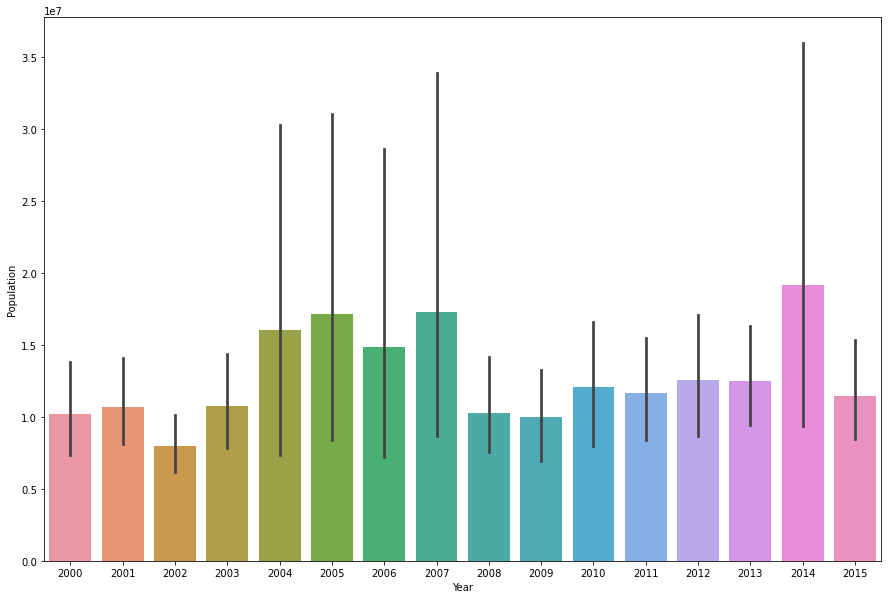

In [23]:
sns.barplot(x='Year', y='Population', data=life_expectancy_df).figure.set_size_inches(15, 10)

The average Population size shows an inconsistent trend. It starts off stable in 2000 to 2001, but then drops in 2002 before increasing in 2003, spiking in 2004 to 2007, but then dropping in 2008. It once again remained relatively stable from 2008 to 2013, then increases significantly in 2014, before dropping again in 2015.

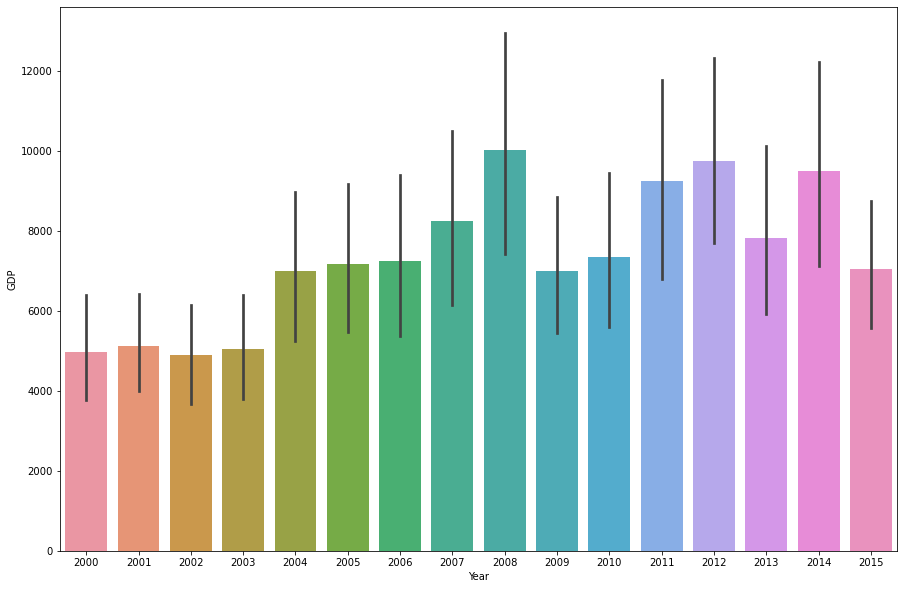

In [24]:
sns.barplot(x='Year', y='GDP', data=life_expectancy_df).figure.set_size_inches(15, 10)

Average GDP shows an overall upward trend, starting at around 5000 USD in 2000, and ending at more than 6000 USD in 2015. The highest average GDP was recorded in 2008, where it reached a value of nearly 10,000 USD. The lowest was in 2002, where the average GDP was around 5000 USD. GDP can be affected by many factors, thus, I would not assume that the average GDP will increase over the years without sufficient data.

### Status

The Status of a country, either Developed or Developing, is a major factor to determine a Population's health and Life Expectancy. Developed countries are almost universally known to have high Life Expectancy and lower mortality rates. This also coincide with their higher GDP compared to Developing countries. However, many Developing countries also have high Life Expectancy despite their lower GDP. Unfortunately, countries with low Life Expectancy and high mortality rates are almost exclusively made up of Developing countries with lower GDP.

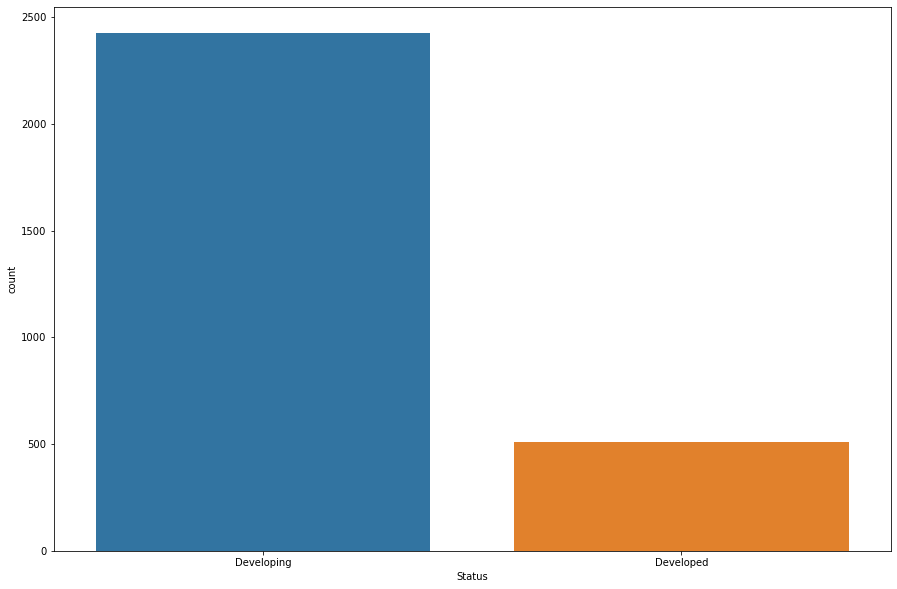

In [25]:
sns.countplot(x='Status', data=life_expectancy_df).figure.set_size_inches(15, 10)

Most of the observations in the dataset are of Developing countries, with the number of observations nearly quadrupling that of Developed countries.

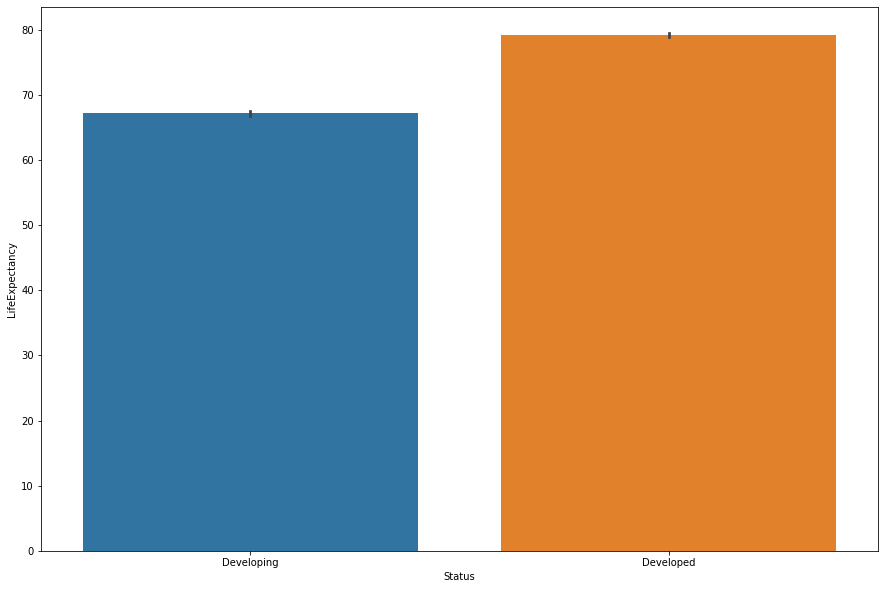

In [26]:
sns.barplot(x='Status', y='LifeExpectancy', data=life_expectancy_df).figure.set_size_inches(15, 10)

Developed countries have a higher average Life Expectancy at around 79 years, compared to the average for Developing countries at roughly 66 years.

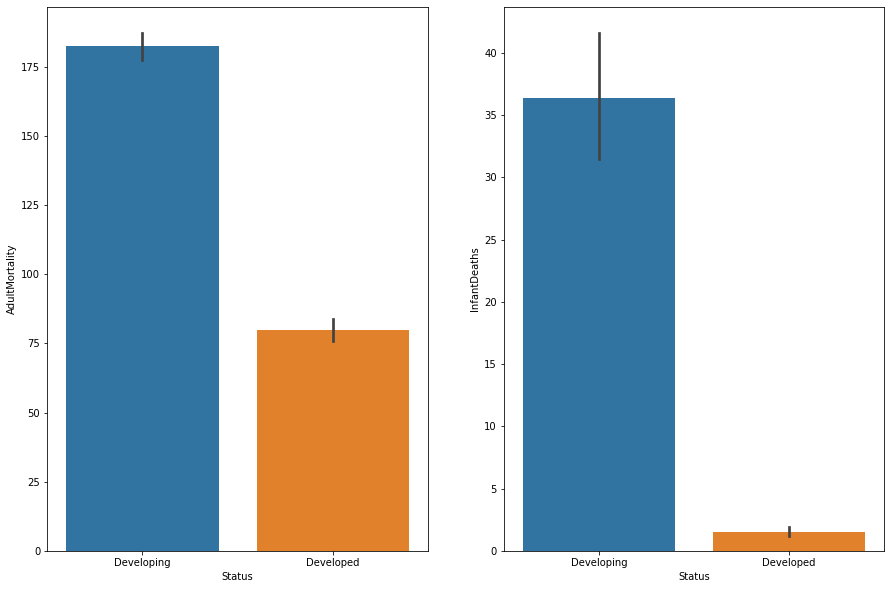

In [27]:
fig, ax = plt.subplots(1, 2)
sns.barplot(x='Status', y='AdultMortality', data=life_expectancy_df, ax=ax[0]).figure.set_size_inches(15, 10)
sns.barplot(x='Status', y='InfantDeaths', data=life_expectancy_df, ax=ax[1]).figure.set_size_inches(15, 10)

Similar to Life Expectancy, Adult Mortality and Infant Deaths rates are both much lower in Developed countries compared to Developing Countries. The average number of Infant Deaths per 1000 shows the biggest difference with Developed countries at around 2 while Developing countries are at a staggering 36.

Developed countries: 2703.60
Developing countries: 323.47



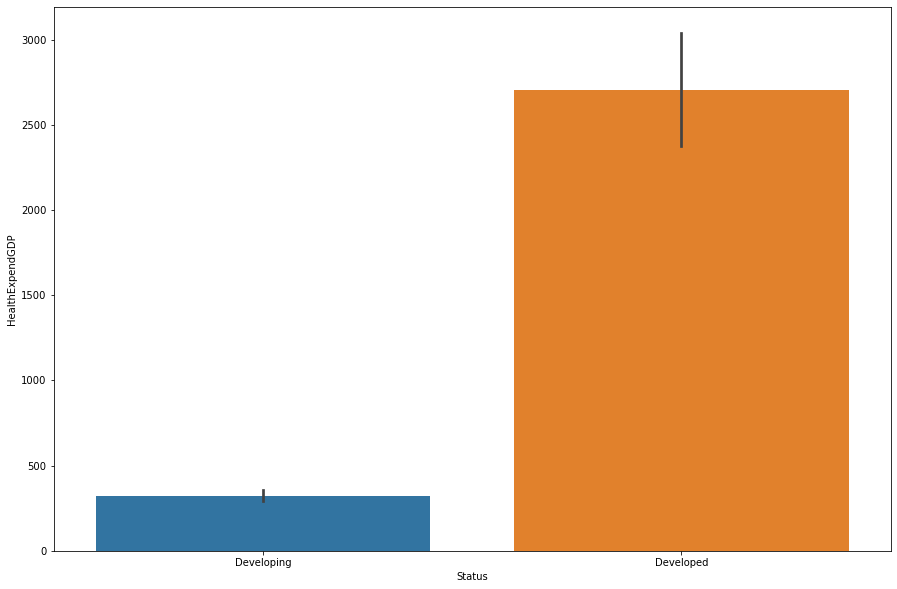

In [28]:
sns.barplot(x='Status', y='HealthExpendGDP', data=life_expectancy_df).figure.set_size_inches(15, 10)
print("Developed countries: {:.2f}".format(life_expectancy_df.loc[(life_expectancy_df['Status'] == 'Developed'), 'HealthExpendGDP'].mean()))
print("Developing countries: {:.2f}\n".format(life_expectancy_df.loc[(life_expectancy_df['Status'] == 'Developing'), 'HealthExpendGDP'].mean()))

Life Expectancy, Adult Mortality and Infant Deaths are all dependent on the amount of Expenditure on Health of a country. With the above graph, we can conclude that Developed countries have a much higher Expenditure on Health at 2703.60, in contrast to Developing countries at only 323.27. This is a large reason why Developed countries have a higher Life Expectancy and much lower Adult Mortality and Infant Deaths rates compared to Developing countries.

### Gross Domestic Product per capita (GDP)

GDP is another crucial feature in determining the health of a Population in a country. On average, Developed countries have a higher GDP compared to Developing countries. This is a major reason why Developed countries have higher Life Expectancy and lower mortality rates compared to Developing countries.

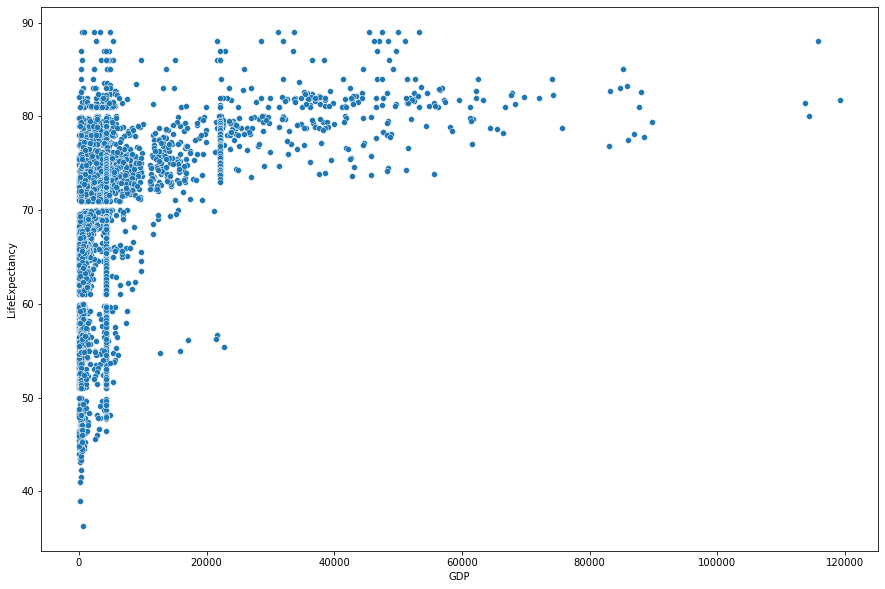

In [29]:
sns.scatterplot(x='GDP', y='LifeExpectancy', data=life_expectancy_df).figure.set_size_inches(15, 10)

The majority of observations have a GDP of under 20,000 USD. Despite this, the majority also have a Life Expectancy of around 65 to 80 years. This means that many countries with smaller GDP still have high Life Expectancy. Countries with higher GDP all have very high Life Expectancy.

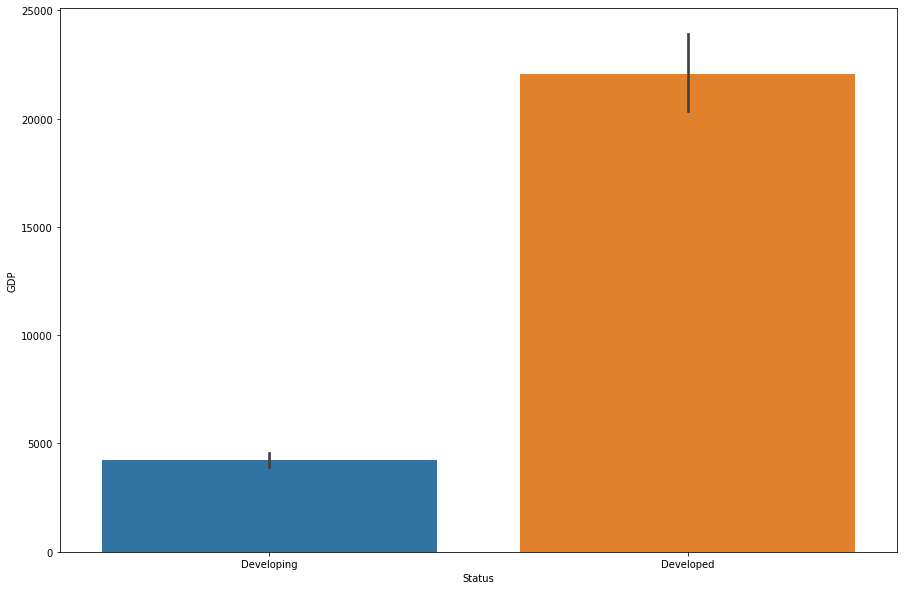

In [30]:
sns.barplot(x='Status', y='GDP', data=life_expectancy_df).figure.set_size_inches(15, 10)

Developed countries have a much higher GDP on average, at roughly 23,000 USD, compared to Developing countries at only around 4000 USD on average. 

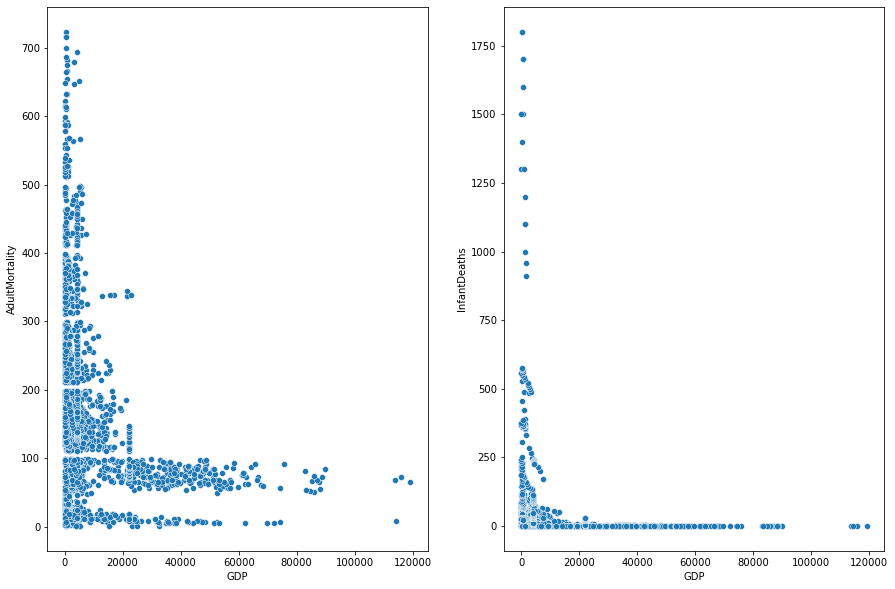

In [31]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(x='GDP', y='AdultMortality', data=life_expectancy_df, ax=ax[0]).figure.set_size_inches(15, 10)
sns.scatterplot(x='GDP', y='InfantDeaths', data=life_expectancy_df, ax=ax[1]).figure.set_size_inches(15, 10)

For both Adult Mortality and Infant Deaths rates, many countries with low GDP have low values for both of these data. However, high Adult Mortality and Infant Deaths rates only exclusively occur in countries with low GDP. Countries with higher GDP all have low Adult Mortality and Infant Deaths rates.

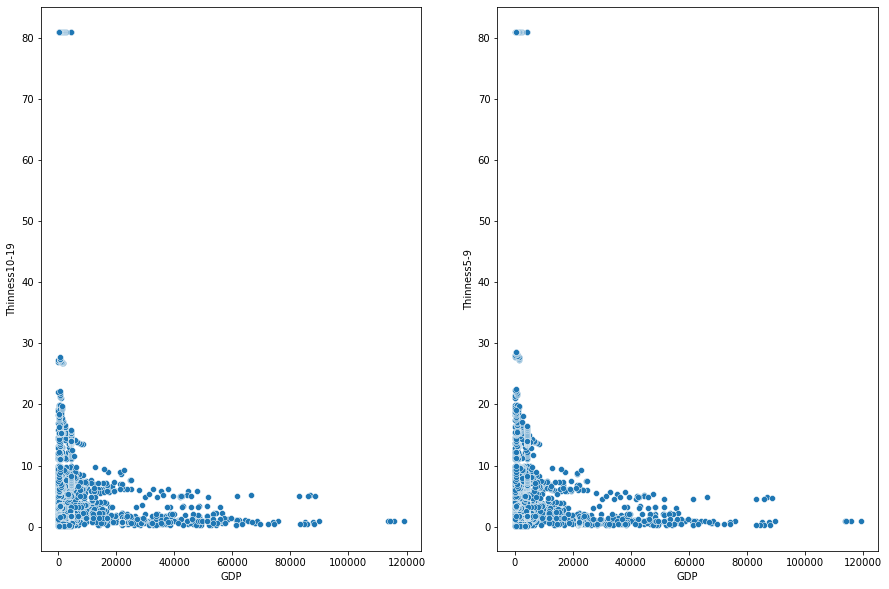

In [32]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(x='GDP', y='Thinness10-19', data=life_expectancy_df, ax=ax[0]).figure.set_size_inches(15, 10)
sns.scatterplot(x='GDP', y='Thinness5-9', data=life_expectancy_df, ax=ax[1]).figure.set_size_inches(15, 10)

Similar to above observations, Thinness rates of adolescents age 10 to 19 and Thinness rates of children age 5 to 9 are both very low for countries with high GDP. The higher the GDP, the lower these rates become. Many countries with lower GDP have low values for these rates while many others with the same lower GDP have higher values for these rates.

### Population

Population could be another factor that affects Life Expectancy and mortality rates. Importantly, Developed countries have on average, a much smaller Population size compared to Developing countries. 

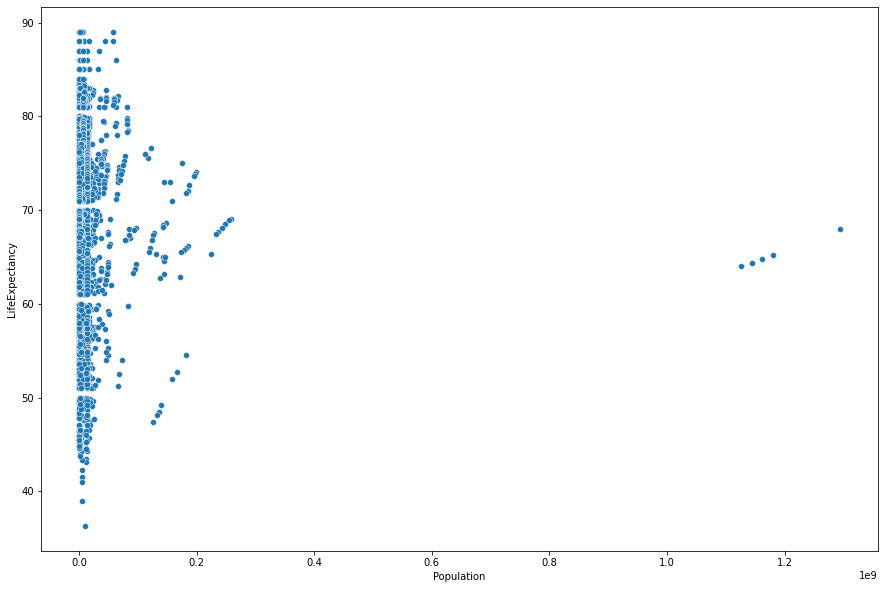

In [33]:
sns.scatterplot(x='Population', y='LifeExpectancy', data=life_expectancy_df).figure.set_size_inches(15, 10)

Countries with a bigger Population are commonly in the range of average Life Expectancy, around 60 to 75 years. On either end, countries with a smaller Population make up the majority of countries with low Life Expectancy, from 60 to 40 years, and also make up the entirety of the group of countries with high Life Expectancy, 75 to 90 years.

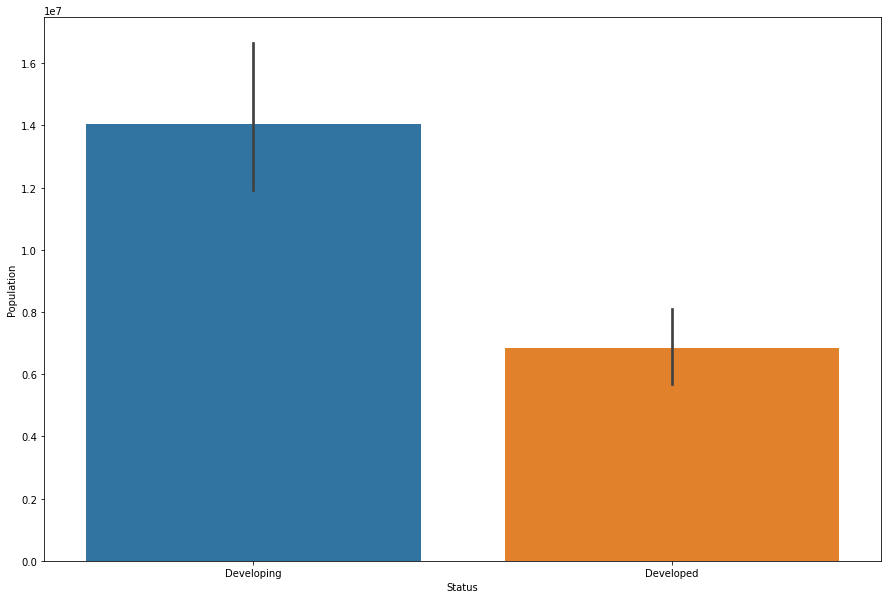

In [34]:
sns.barplot(x='Status', y='Population', data=life_expectancy_df).figure.set_size_inches(15, 10)

Developing countries have twice the Population size on average compared to Developed countries.

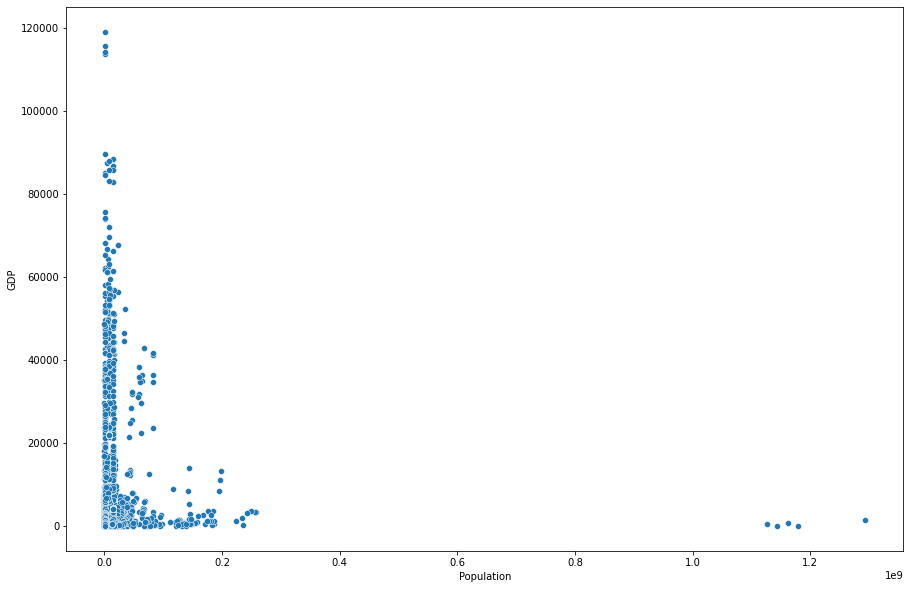

In [35]:
sns.scatterplot(x='Population', y='GDP', data=life_expectancy_df).figure.set_size_inches(15, 10)

The bottom range of GDP consists largely of countries with a bigger Population. Countries with an average Population size are situated around the average range of GDP, while countries with a smaller Population are at the highest range of GDP.

## Data Cleaning and Preprocessing

I have been able to draw important and insightful conclusions from the Exploratory Data Analysis section above. Now, I will perform a thorough cleaning and preprocessing of the data, preparing the data for modelling. In this section, I will analyse the correlations between the features, dealing with independent features that have too high of a correlation with one another. I will also plot the distributions of the quantitative features and transform the distributions appropriately and as needed. Box plots will be created for each quantitatve feature to find outliers for each of the feature. Feature Engineering will also be included in this section.

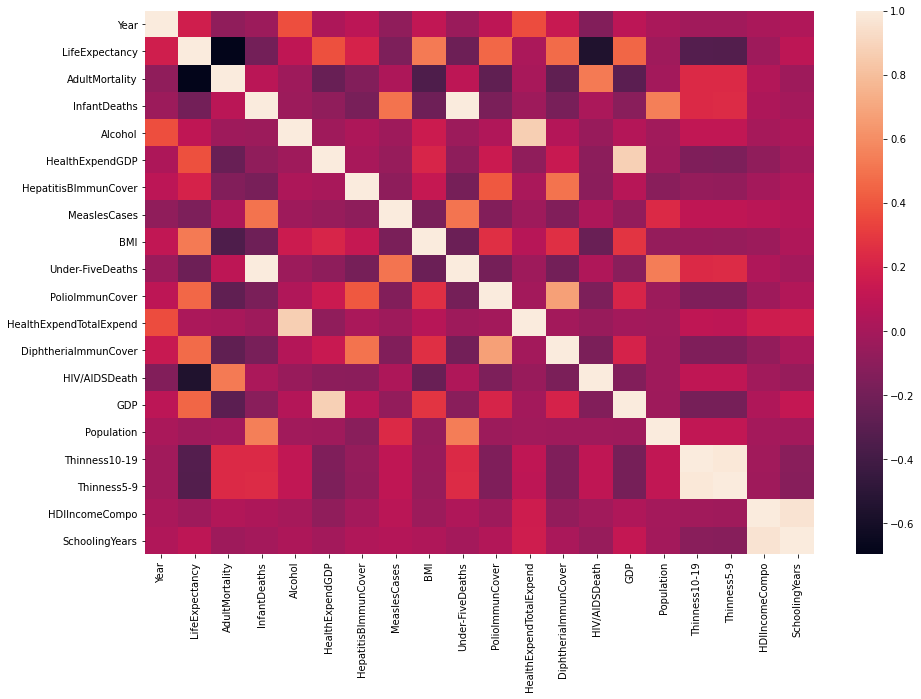

In [36]:
quantitative_features = life_expectancy_df.select_dtypes(exclude=['object'])
sns.heatmap(quantitative_features.corr(), xticklabels=True, yticklabels=True).figure.set_size_inches(15, 10)

The above heatmap gives me insights into strong correlations between certain features. The target feature, Life Expectancy, has strongly negative correlations with both HIV/AIDS Death and Adult Mortality. This means that these two indepedent variables are very important in predicting Life Expectancy. Additionally, Infant Deaths is a subset of Under-Five Deaths, therefore, they have a strong positive correlation with one another. Because of this, I will be removing Infant Deaths as it is a redundant feature, already being included in Under-Five Deaths. Lastly, Thinness 5-9 and Thinness 10-19 have a strong positive correlation. Therefore, I will be combining both features into a new feature labelled Thinness 5-19.

In [37]:
# Removing Infant Deaths feature
life_expectancy_df.drop('InfantDeaths', axis=1, inplace=True)

# Combining Thinness 5-9 and Thinness 10-19
life_expectancy_df['Thinness5-19'] = life_expectancy_df['Thinness5-9'] + life_expectancy_df['Thinness10-19']

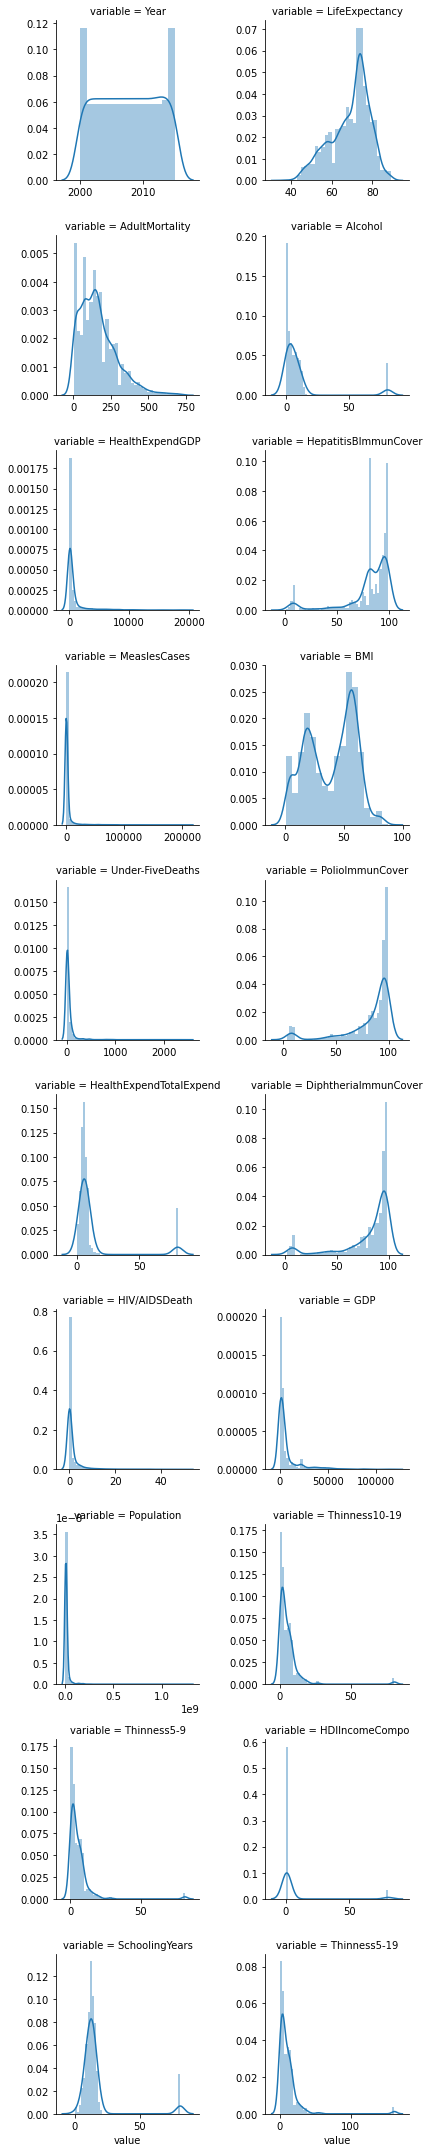

In [38]:
quantitative_features = life_expectancy_df.select_dtypes(exclude=['object'])
quantitative_features_df = pd.melt(life_expectancy_df, value_vars=quantitative_features)

# Facet Grid to output the distributions of all the quantitative features
facet_grid = sns.FacetGrid(quantitative_features_df, col="variable", col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, "value")

Many features are right-skewed, and thus will be Log Transformed. Left-skewed features will be Square Transformed.

In [39]:
# Function to perform Log Transformation on a feature
def log_transform(df, feature):
    df[feature] = df[feature].apply(lambda x: np.log1p(x) if x > 0 else x)
    
# Function to perform Square Transformation on a feature
def square_transform(df, feature):
    df[feature + "^2"] = df[feature] ** 2

In [40]:
# Features to Log Transform
log_transform_features = ['AdultMortality', 'HealthExpendGDP', 'MeaslesCases', 'Under-FiveDeaths', 'HealthExpendTotalExpend', 'HIV/AIDSDeath', 'GDP', 'Population', 'SchoolingYears',
                          'Thinness5-9', 'Thinness10-19', 'Thinness5-19']

for feature in log_transform_features:
    log_transform(life_expectancy_df, feature)
    
# Features to Square Transform
square_transform_features = ['HepatitisBImmunCover', 'PolioImmunCover', 'DiphtheriaImmunCover']

for feature in square_transform_features:
    square_transform(life_expectancy_df, feature)

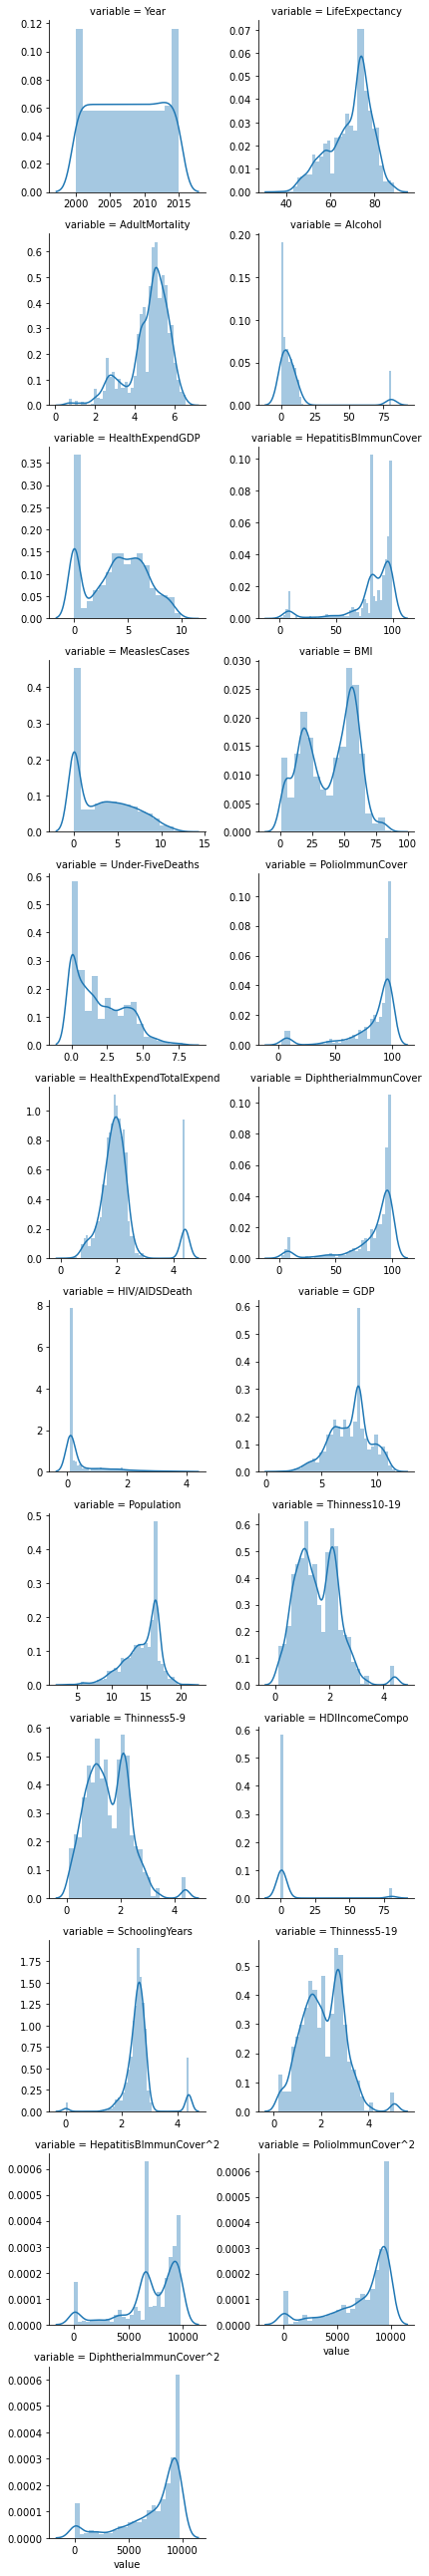

In [41]:
# View the distributions after transformation
quantitative_features = life_expectancy_df.select_dtypes(exclude=['object'])
quantitative_features_df = pd.melt(life_expectancy_df, value_vars=quantitative_features)

facet_grid = sns.FacetGrid(quantitative_features_df, col="variable", col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, "value")

After transformation, most of the features became a lot more normally distributed. This will improve the performance of the model that will be used in the upcoming section.

S:\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


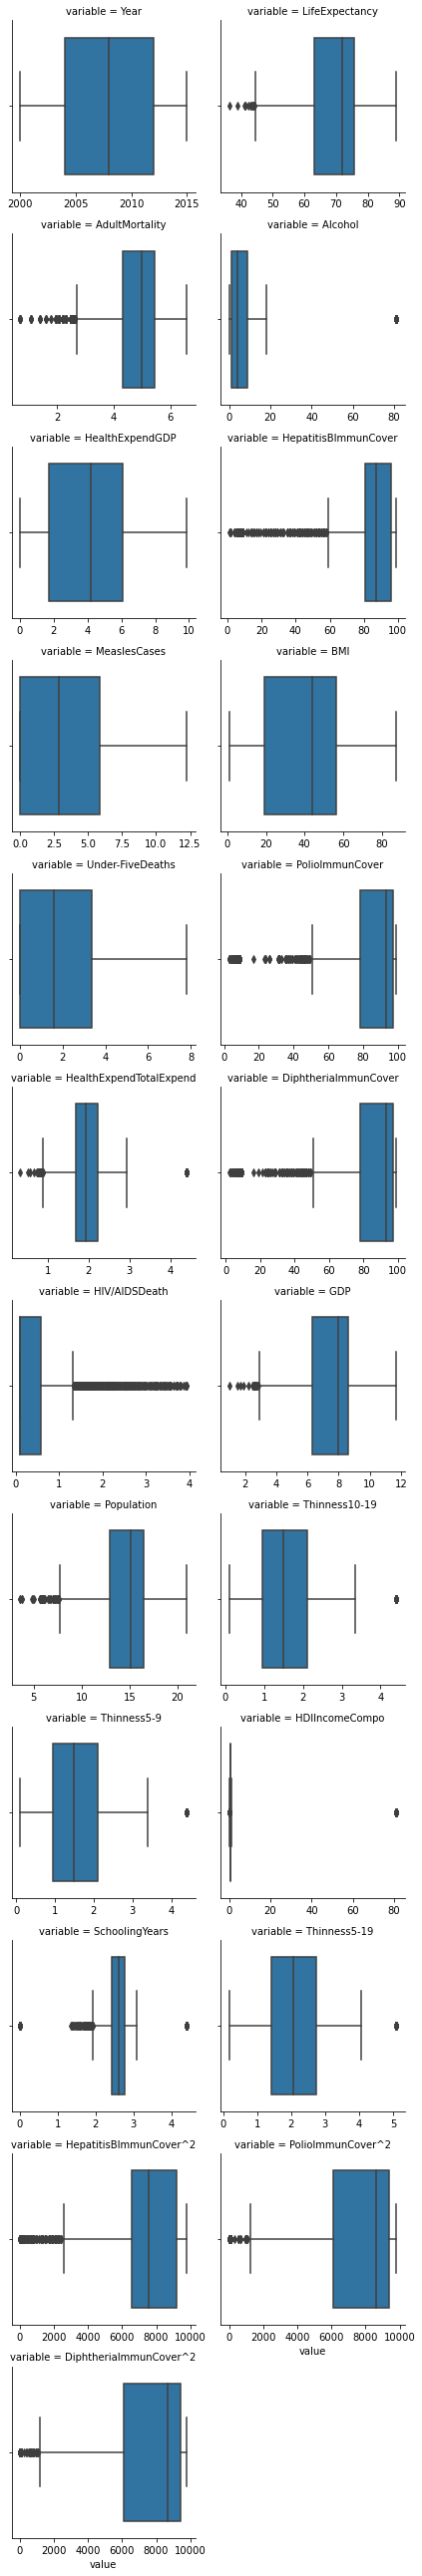

In [42]:
# Output Box plots for all of the quantitative features
quantitative_features = life_expectancy_df.select_dtypes(exclude=['object'])
quantitative_features_df = pd.melt(life_expectancy_df, value_vars=quantitative_features)

facet_grid = sns.FacetGrid(quantitative_features_df, col="variable", col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.boxplot, "value")

Many quantitative features in this dataset have values that are outliers. I will try to determine exactly how many outliers are present in the entire dataset.

In [43]:
# Threshold for a value to be an outlier
threshold = 3
n_outliers = 0

# Iterate through each feature in the dataset
for feature in life_expectancy_df.select_dtypes(exclude=['object']):
    # Get the mean and standard deviation of values in each feature
    mean = life_expectancy_df[feature].mean()
    std = life_expectancy_df[feature].std()
    # Iterate through each row
    for index, row in life_expectancy_df.iterrows():
        if std != 0:
            # Calculate the z-score
            z_score = (life_expectancy_df[feature][index] - mean) / std
            # If z-score is above the threshold, the value is an outlier
            if np.abs(z_score) > threshold:
                n_outliers += 1
                
print("The total number of outliers in this dataset: {}".format(n_outliers))

The total number of outliers in this dataset: 1541


With so many outliers, removing the observations that contain these outliers would mean dropping a large portion of the data, therefore, is not a good idea. Replacing these outliers with the mean value might also skew the distributions of the features as I would be replacing too many values. Therefore, I will deal with the outliers by using a Random Forest Regressor model. Random Forest is more robust and can handle outliers more effectively compared to a Linear Regression model.

In [44]:
import category_encoders as ce

In [45]:
# Perform Binary Encoding on the categorical features in the dataset
binary_encoder = ce.BinaryEncoder(cols=['Country', 'Status'])
life_expectancy_df = binary_encoder.fit_transform(life_expectancy_df)

# Remove all duplicated columns
life_expectancy_df = life_expectancy_df.loc[:, ~life_expectancy_df.columns.duplicated()]
life_expectancy_df.head(10)

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Country_8,Year,...,GDP,Population,Thinness10-19,Thinness5-9,HDIIncomeCompo,SchoolingYears,Thinness5-19,HepatitisBImmunCover^2,PolioImmunCover^2,DiphtheriaImmunCover^2
0,0,0,0,0,0,0,0,0,1,2015,...,6.372055,17.334091,2.901422,2.906901,0.479,2.406945,3.569533,4225.0,36.0,4225.0
1,0,0,0,0,0,0,0,0,1,2014,...,6.419501,12.699497,2.917771,2.917771,0.476,2.397895,3.583519,3844.0,3364.0,3844.0
2,0,0,0,0,0,0,0,0,1,2013,...,6.450067,17.272826,2.928524,2.928524,0.470,2.388763,3.594569,4096.0,3844.0,4096.0
3,0,0,0,0,0,0,0,0,1,2012,...,6.508708,15.123021,2.939162,2.944439,0.463,2.379546,3.608212,4489.0,4489.0,4489.0
4,0,0,0,0,0,0,0,0,1,2011,...,4.167242,14.906964,2.954910,2.954910,0.454,2.351375,3.621671,4624.0,4624.0,4624.0
5,0,0,0,0,0,0,0,0,1,2010,...,6.317758,14.874400,2.965273,2.965273,0.448,2.322388,3.632309,4356.0,4356.0,4356.0
6,0,0,0,0,0,0,0,0,1,2009,...,6.102320,12.557898,2.975530,2.980619,0.434,2.292535,3.645450,3969.0,3969.0,3969.0
7,0,0,0,0,0,0,0,0,1,2008,...,5.925221,14.819604,2.985682,2.990720,0.433,2.272126,3.655840,4096.0,4096.0,4096.0
8,0,0,0,0,0,0,0,0,1,2007,...,5.915759,17.097053,2.995732,3.000720,0.415,2.240710,3.666122,3969.0,3969.0,3969.0
9,0,0,0,0,0,0,0,0,1,2006,...,5.611535,14.766916,3.005683,3.010621,0.405,2.208274,3.676301,4096.0,3364.0,3364.0


In [46]:
# Save the clean and preprocessed dataset
life_expectancy_df.to_csv("datasets/life_expectancy_preprocessed.csv")

## Modelling

The data has been thoroughly clean and preprocessed, so I will now create a model to predict the Life Expectancy of a country given the data as inputs. Because of the huge number of outliers in the features, I will be using a Decision Tree as it is more robust and handles outliers much more effectively compared to a standard Regression model. Specifically, I will be using a Random Forest Regressor model which I will be building from scratch. At the end, I will evaluate the performance of my model.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
# Get the preprocessed dataset
life_expectancy_df = pd.read_csv("datasets/life_expectancy_preprocessed.csv")

In [49]:
# Seperate the data into X and y
X = life_expectancy_df.drop('LifeExpectancy', axis=1)
y = life_expectancy_df['LifeExpectancy']

In [50]:
# Split X and y into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [51]:
# Normalize the data
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[-0.19743305,  0.        , -0.69631062, ..., -0.16834759,
        -0.15918879, -0.15839385],
       [-1.16822995,  0.        , -0.69631062, ...,  0.81949457,
         0.46167976,  0.46277344],
       [-0.88473343,  0.        , -0.69631062, ...,  0.27379132,
         0.7985715 ,  0.79982728],
       ...,
       [-0.56788438,  0.        , -0.69631062, ..., -0.28340432,
        -0.65764745, -0.55121157],
       [-0.04853782,  0.        , -0.69631062, ..., -2.58781423,
        -0.65764745, -0.38709635],
       [ 1.40587079,  0.        ,  1.43614066, ..., -0.16834759,
        -2.57210972, -2.57247581]])

### Building a Regression Tree

To start building a Random Forest Regressor, I must first build a Decision Tree Regressor, which I will be calling a Regression Tree in this case.

In [52]:
# Create the class for a Regression Tree
class RegressionTree:
    """ Includes methods for fitting the data into the model and predicting the values of the target
        feature, given the testing dataset """
    
    def fit(self, X, y, min_leaf=20):
        # Create the head Node of the tree
        self.regrtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
        return self
    
    def predict(self, X):
        return self.regrtree.predict(X.values)


In [53]:
# Create the class for a Node in the Regression Tree
class Node:
    """ Initialize the values of a Node and create all important operations of the Regression Tree """
    
    def __init__(self, x, y, indexes, min_leaf=20):
        self.x = x
        self.y = y
        self.indexes = indexes
        self.min_leaf = min_leaf
        self.num_row = len(indexes)
        self.num_col = x.shape[1]
        self.val = np.mean(y.iloc[indexes])
        self.score = float('inf')
        # Execute the split() method when a Node is created
        self.split()
        
    def split(self):
        # Iterate through the indexes of the columns
        for col_index in range(self.num_col):
            # Determine if current column is the best column for splitting
            self.find_best_split(col_index)
            
        # If this Node is a leaf (can't find a better column for splitting in this subset)
        if self.is_leaf:
            return
        
        # Split the subset into two smaller subsets based on the best column and its threshold value
        x = self.x.values[self.indexes, self.col_index]
        left = np.nonzero(x <= self.threshold)[0]
        right = np.nonzero(x > self.threshold)[0]
        
        # Create two new Nodes to store the two new subsets
        self.left = Node(self.x, self.y, self.indexes[left], self.min_leaf)
        self.right = Node(self.x, self.y, self.indexes[right], self.min_leaf)
        
    def find_best_split(self, col_index):
        x = self.x.values[self.indexes, col_index]
        # Iterate through the indexes of the rows
        for row_index in range(self.num_row):
            # Test each datapoint in the column as the threshold
            left = x <= x[row_index]
            right = x > x[row_index]
            
            # Check if a valid number of observations exist in either subsets
            if left.sum() < self.min_leaf or right.sum() < self.min_leaf:
                continue
                
            # Calculate the score of the threshold
            current_score = self.calculate_score(left, right)
            
            # If the threshold's score is smaller than the Node's score, assign the current threshold and column as the Node's threshold and column
            if current_score < self.score:
                self.col_index = col_index
                self.score = current_score
                self.threshold = x[row_index]
                
    def calculate_score(self, left, right):
        # Calculate the weighted averages of the standard deviations (the score value), equivalent to minimizing the RMSE
        y = self.y.iloc[self.indexes]
        left_std = y[left].std()
        right_std = y[right].std()
        weighted_score = left_std * left.sum() + right_std * right.sum()
        return weighted_score

    @property
    def is_leaf(self):
        # A Node is a leaf if its score remains the same as the default score of Infinity
        return self.score == float('inf')
    
    def predict(self, x):
        # Return an array of predicted values for the target feature
        return np.array([self.predict_row(x_val) for x_val in x])
    
    def predict_row(self, x_val):
        # If the Node is a leaf, return its value
        if self.is_leaf:
            return self.val
        # Traverse to either the left child Node or right child Node, depending on the value under the Node's column and the threshold value of the Node
        node = self.left if x_val[self.col_index] <= self.threshold else self.right
        # Recursively traverse through the Nodes in the Regression Tree until a leaf Node is reached
        return node.predict_row(x_val)
    

With a Regression Tree model built and ready for use, I will build a Random Forest Regressor model, calling it a Random Forest Regression model to differentiate between it and sklearn's RandomForestRegressor model, using multiple instances of the Regression Tree model.

In [54]:
# Create the class for the Random Forest Regression model
class RandomForestRegression:
    """ Initialize the values for the class and all required methods """
    
    def __init__(self, min_leaf=20, size_bootstrap=1000, num_trees=10):
        self.min_leaf = min_leaf
        self.size_bootstrap = size_bootstrap
        self.num_trees = num_trees
        self.forest = []
        
    def fit(self, x, y):
        # Store x and y, and create the forest
        self.x = x
        self.y = y
        self.create_forest()
        
    def create_forest(self):
        # Train a number of Regression Trees on random subsets of the data and store them inside of the forest
        for i in range(self.num_trees):
            x_bootstrap, y_bootstrap = self.bootstrapping()
            regr_tree = RegressionTree().fit(x_bootstrap, y_bootstrap, self.min_leaf)
            self.forest.append(regr_tree)
            
    def bootstrapping(self):
        # Generate a random group of indexes corresponding to a random subset of observations
        bootstrap_indexes = np.random.randint(low=0, high=len(self.x), size=self.size_bootstrap)
        # Locate the x and y subsets based on the random group of indexes
        x_bootstrap = self.x.iloc[bootstrap_indexes]
        y_bootstrap = self.y.iloc[bootstrap_indexes]
        return x_bootstrap, y_bootstrap
    
    def predict(self, x):
        # Return the mean of prediction values of all Regression Trees inside the forest at each data point
        return np.mean([regr_tree.predict(x) for regr_tree in self.forest], axis=0)
    

With the Random Forest Regression model built, I will fit the training data into the model and then evaluate it in the next section.

In [55]:
regr = RandomForestRegression()
regr.fit(X_train, y_train)

## Evaluation

The model has been fitted using the training datasets. Now, I will evaluate the performance of the model using the R2 score evaluation metric.

In [58]:
from sklearn import metrics

In [59]:
y_pred = regr.predict(X_test)
print(metrics.r2_score(y_test, y_pred))

0.9249409234285746


The score is very high, meaning that this model yielded very good performance. Tweaking and testing out different combinations of values for the model's parameters could further improve its performance, but for this project, I have sticked with a set of parameters that I have found to output the best results so far.

## Conclusion

I have learnt a lot from this project. Many observations and conclusions on the data have been drawn from analysing the different graphs and plots in the Exploratory Data Analysis section. I have also gained much experience from the process of cleaning, preprocessing and performing feature engineering on the data. Last but not least, building a Random Forest Regressor model from scratch was a challenging task and in order to have successfully built it, I had needed to fully understand and comprehend the functionalities and intricacies behind the workings of the model.